In [1]:
import tables
import numpy as np
import dragoman as dm
from matplotlib import pyplot as plt
from freedom.utils.i3frame_dataloader import DEFAULT_LABELS as parnames

In [2]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

In [3]:
# from Aaron

def fill_variable_dict(name, node, var_dict):
    print(f"Loading {name}")
    if 'vector_index' in node.colnames:
        for par, parname in zip(node.cols.item[:].reshape((-1, len(parnames))).T, parnames):
            var_dict[f"{name}_{parname}"] = par
    else:
        var_dict[name] = node.cols.value[:]
        

def unpack_file_data(file):
    root = file.root
    
    var_dict = {}
    for node in root:
        try:
            col_names = node.colnames
        except tables.NoSuchNodeError:
            continue

        name = node.name.replace('FreeDOM_test_', '').replace('_params', '')
        name = name.replace('best_fit', 'freedom')
        fill_variable_dict(name, node, var_dict)
        
    return var_dict
    

def load_file(f_name):
    with tables.File(f_name) as file:
        return dm.PointData(**unpack_file_data(file))

In [4]:
%%time
# File at cobalt:/data/user/afienberg/freeDOM/hdf5_summary/freeDOM_3_21_full.hdf5
d = load_file('/remote/ceph/user/p/peller/oscNext/level7_v01.04_freedom/freeDOM_3_21_full.hdf5')
print(f'Loaded {d["true_x"].size} events')

Loading best_LLH
Loading freedom
Loading delta_T
Loading env_mins
Loading env_p2
Loading means
Loading n_crs_iters
Loading n_llh_calls
Loading stds
Loading truth_LLH
Loading interaction_type
Loading pdg_id
Loading retro
Loading true
Loaded 8010633 events
CPU times: user 1min 33s, sys: 7.09 s, total: 1min 40s
Wall time: 2min 47s


In [5]:
d

best_LLH,-12.4,-10.7,-13.3,...,592,30,263
freedom_x,-24.4,108,-6.07,...,57.9,111,-56.3
freedom_y,17.3,-53.2,-78.1,...,91.5,-45.2,-78.8
freedom_z,-229,-393,-383,...,-261,-538,-552
freedom_time,9790,9820,9850,...,9740,10100,9410
freedom_azimuth,2.36,3.11,0.552,...,2.26,2.26,3.5
freedom_zenith,2.33,2.19,1.99,...,1.75,1.66,1.93
freedom_cascade_energy,7.36,0.358,0.941,...,380,21.7,23.3
freedom_track_energy,2.93,6.44,4.84,...,9.29,0.000482,63.9
delta_T,19.2,21.7,18.2,...,16.5,10.9,10.6
env_mins_x,-25.2,109,-6.28,...,57.9,111,-49.5


In [6]:
for reco in ['true', 'retro', 'freedom']:
    d[f'{reco}_energy'] = d[f'{reco}_cascade_energy'] +  d[f'{reco}_track_energy'] 
    
for dim in ['x', 'y', 'z', 'time', 'azimuth', 'zenith', 'track_energy', 'cascade_energy', 'energy']:
    for reco in ['retro', 'freedom']:
        d[f'{reco}_{dim}_error'] = d[f'{reco}_{dim}'] - d[f'true_{dim}']
        if 'energy' in dim:
            d[f'{reco}_log_{dim}_error'] = np.log(d[f'{reco}_{dim}'] + 1e-3) - np.log(d[f'true_{dim}'] + 1e-3)     

In [7]:
#dims = ['x', 'y', 'z', 'time', 'azimuth', 'zenith', 'log_track_energy', 'log_cascade_energy', 'log_energy']
dims = ['x', 'y', 'z', 'time', 'azimuth', 'zenith', 'track_energy', 'cascade_energy', 'energy']

In [8]:
mask = (d['interaction_type'] == 1) & (np.abs(d['pdg_id']) == 14)
numucc = d[mask]
nuall = d[~mask]

In [9]:
def plot_quantiles(frame, log=True):
    fig, ax = plt.subplots(3,3, figsize=(18, 15), sharex=True)
    ax = ax.flatten()
    plt.subplots_adjust(hspace=0.1, wspace=0.35)
    for i, dim in enumerate(dims):
        if i == 0:
            f_labels = ['Freedom central 90%', 'Freedom central 50%', 'Freedom Median']
            r_labels = ['Retro central 90%', 'Retro central 50%', 'Retro Median']
        else:
            f_labels = r_labels = None
        frame.plot_bands(f'retro_{dim}_error', filled=False, lines=True, linestyles=[':', '--', '-'], lw=2, linecolors=['tab:orange']*3
                       , labels=r_labels, ax=ax[i])
        frame.plot_bands(f'freedom_{dim}_error', cmap="Greens", labels=f_labels, ax=ax[i])
        ax[i].set_ylabel(f'{dim} (true - reco)')
        ax[i].axhline(0, c='k', lw=1, alpha=0.5)
        if log:
            ax[i].set_xscale('log')

        if i < 6:
            ax[i].set_xlabel("")
    ax[0].legend()

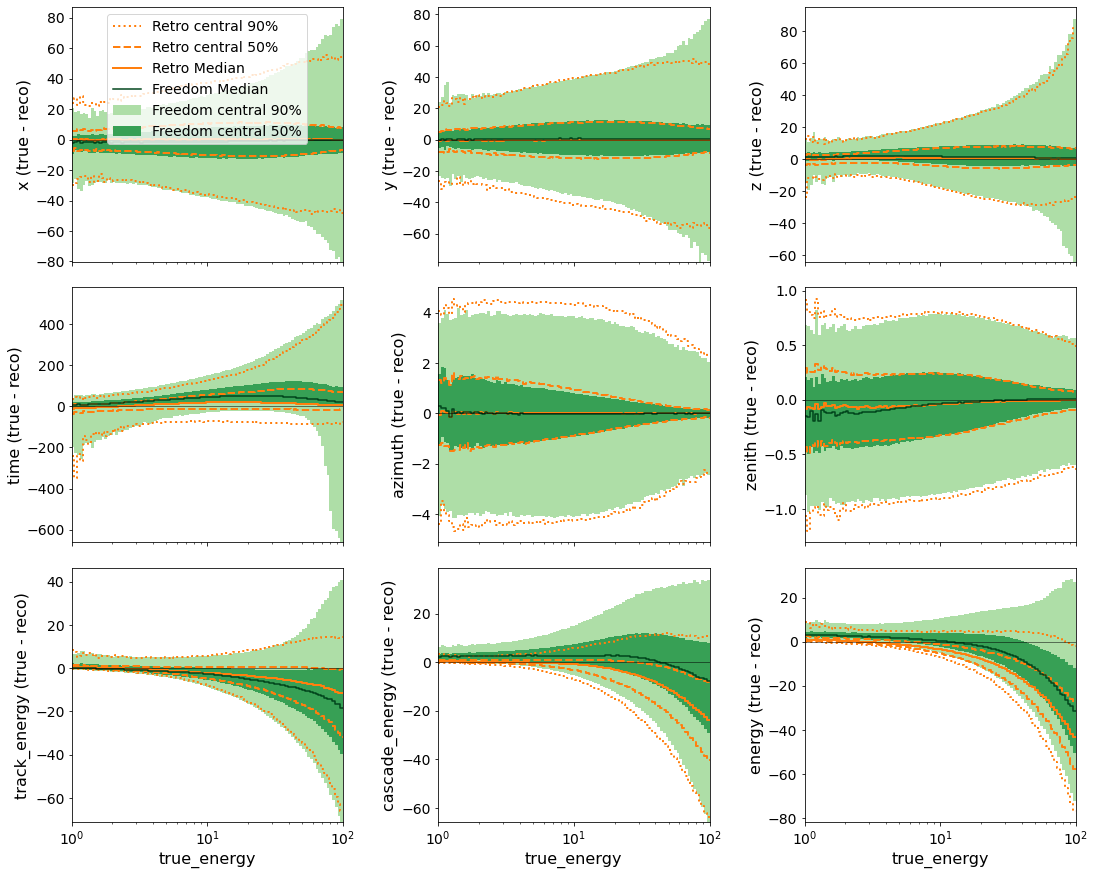

In [10]:
ee = dm.Edges(np.logspace(0,2,100))
numucc_energy_qtls = numucc.binwise(true_energy=ee).quantile(q=[0.05, 0.25, 0.5, 0.75, 0.95])
plot_quantiles(numucc_energy_qtls)

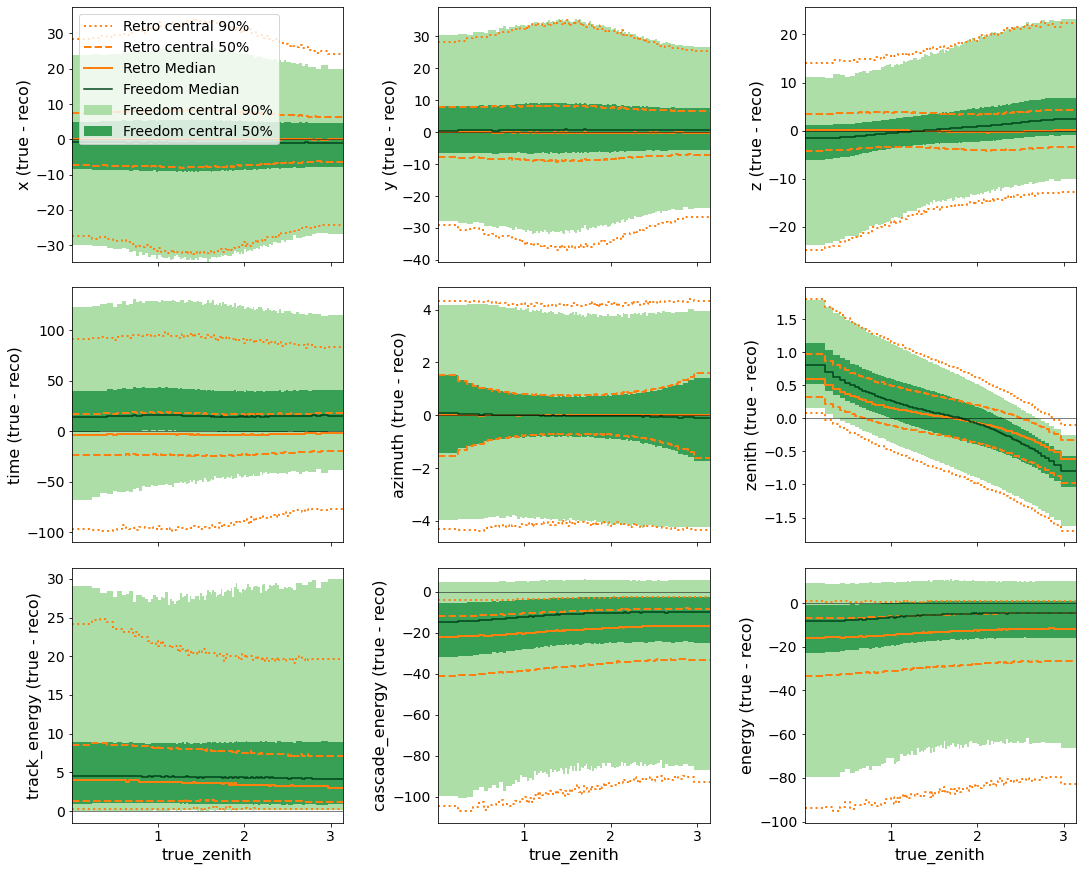

In [11]:
plot_quantiles(nuall.binwise(true_zenith=dm.core.edges.QuantileEdges(nuall['true_zenith'] ,100)).quantile(q=[0.05, 0.25, 0.5, 0.75, 0.95]), log=False)

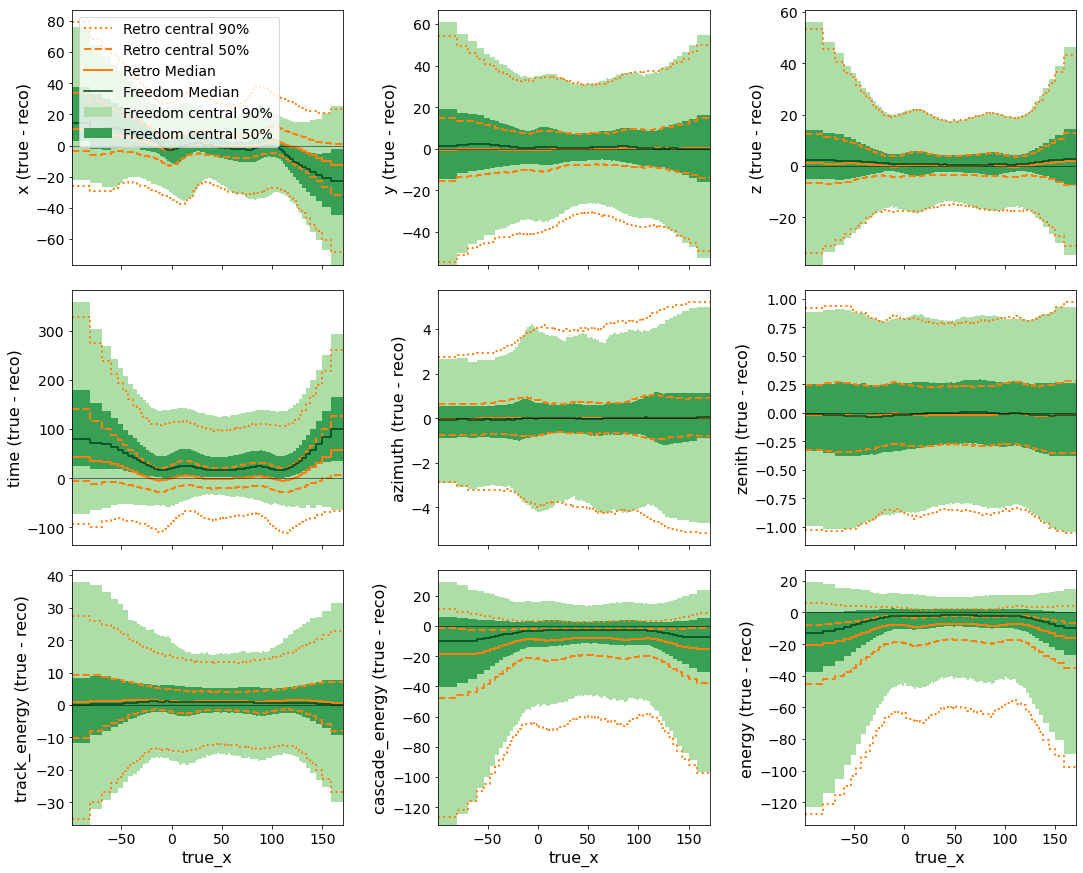

In [12]:
plot_quantiles(d.binwise(true_x=dm.core.edges.QuantileEdges(d['true_x'] ,100)[1:-2]).quantile(q=[0.05, 0.25, 0.5, 0.75, 0.95]), log=False)